<a href="https://colab.research.google.com/github/Salanakya/CV-projekt/blob/main/computer_vision_projekt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Computer Vision klasyfikacja płci na podstawie datasetu CelebA**

#Kaggle

In [63]:
!pip install kaggle #Install the Kaggle library

In [ ]:
! mkdir ~/.kaggle #Make a directory named “.kaggle”

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! cp kaggle.json ~/.kaggle/ #Copy the “kaggle.json” into this new directory

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json #Allocate the required permission for this file.

In [ ]:
! kaggle datasets list #You can check if everything's okay by running this command - ALL DATASETS AVAILABLE

ref                                                                            title                                             size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
datasets/muratkokludataset/acoustic-extinguisher-fire-dataset                  Acoustic Extinguisher Fire Dataset               621KB  2022-04-02 22:59:36           1202        783  0.9375           
datasets/muratkokludataset/rice-image-dataset                                  Rice Image Dataset                               219MB  2022-04-03 02:12:00           1277        727  0.875            
datasets/mdmahmudulhasansuzan/students-adaptability-level-in-online-education  Students Adaptability Level in Online Education    6KB  2022-04-16 04:46:28           4455        111  1.0              


In [ ]:
!kaggle datasets download -d jessicali9530/celeba-dataset #Downloading Datasets

celeba-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [75]:

!unzip celeba-dataset.zip #Unzip the data

Archive:  celeba-dataset.zip
replace img_align_celeba/img_align_celeba/000001.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

#Import bibliotek & sprawdzenie datasetu

In [79]:
import pandas as pd
import numpy as np
import cv2  
from google.colab.patches import cv2_imshow
import os
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.metrics import f1_score
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
data = pd.read_csv('list_attr_celeba.csv')
#data.set_index('image_id',inplace = True) #co nam to daje?
data.head()

,image_id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,000001.jpg,-1,1,1,-1,-1,-1,-1,-1,-1,...,-1,1,1,-1,1,-1,1,-1,-1,1
1,000002.jpg,-1,-1,-1,1,-1,-1,-1,1,-1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,1
2,000003.jpg,-1,-1,-1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,1,-1,-1,-1,-1,-1,1
3,000004.jpg,-1,-1,1,-1,-1,-1,-1,-1,-1,...,-1,-1,1,-1,1,-1,1,1,-1,1
4,000005.jpg,-1,1,1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,1


In [64]:
attr_data = pd.read_csv('list_attr_celeba.csv')
attr_data.replace(to_replace=-1, value=0, inplace=True)
attr_data.head()

,image_id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,000001.jpg,0,1,1,0,0,0,0,0,0,...,0,1,1,0,1,0,1,0,0,1
1,000002.jpg,0,0,0,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
2,000003.jpg,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
3,000004.jpg,0,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,1,1,0,1
4,000005.jpg,0,1,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1


In [ ]:
# List of available attributes
file = pd.read_csv('list_attr_celeba.csv')
for col in file.columns:
    print(col)

#Podzial na zestawy:


*   treningowy 1 - 162 770
*   walidacyjny 162 771 - 182 637
*   testowy 182 638 - 202 599





In [66]:
trainingset = pd.read_csv('list_attr_celeba.csv')
trainingset=trainingset.iloc[0:162770]

In [69]:
validatingset = pd.read_csv('list_attr_celeba.csv')
validatingset=validatingset.iloc[162770:182637]

In [70]:
testingset = pd.read_csv('list_attr_celeba.csv')
testingset=testingset.iloc[182637:202599]

#Badanie zbilansowania zbiorów

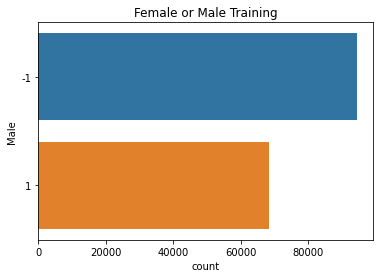

-1    94509
 1    68261
Name: Male, dtype: int64

In [71]:
# Female or Male training
plt.title('Female or Male Training')
sns.countplot(y='Male', data=trainingset)
plt.show()

trainingset['Male'].value_counts()

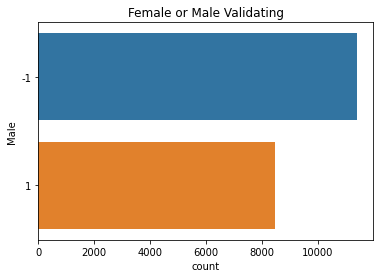

-1    11409
 1     8458
Name: Male, dtype: int64

In [72]:
# Female or Male validating
plt.title('Female or Male Validating')
sns.countplot(y='Male', data=validatingset)
plt.show()

validatingset['Male'].value_counts()

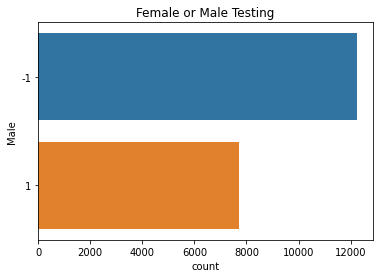

-1    12247
 1     7715
Name: Male, dtype: int64

In [73]:
# Female or Male testing
plt.title('Female or Male Testing')
sns.countplot(y='Male', data=testingset)
plt.show()

testingset['Male'].value_counts()

#Sprawdzanie rozmiarów

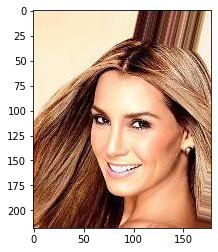

In [89]:
import matplotlib.image as mpimg
img = mpimg.imread('/content/img_align_celeba/img_align_celeba/000001.jpg')
plt.imshow(img)

plt.show()

In [90]:
print(img.shape)

(218, 178, 3)


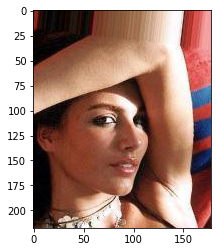

(218, 178, 3)


In [93]:

img2 = mpimg.imread('/content/img_align_celeba/img_align_celeba/111666.jpg')
plt.imshow(img2)

plt.show()
print(img2.shape)

koncowe komenty od Bartka
plt.figure()

Add-subplots()



generowanie randomowych
np.random.choice([])

nie mozna wszystkich do x , trzeba je przeniesc do konkretnej lokalizacji -> https://zddatapol18.slack.com/archives/C03E6NR471B/p1652540649915439
train/male -> po atrybucie Male

#Dzielenie zbiorów na podfoldery wg płci